Formato: None, Tamanho: (315, 238), Modo: L
Formato: None, Tamanho: (147, 201), Modo: L
Formato: None, Tamanho: (162, 214), Modo: L
Formato: None, Tamanho: (417, 341), Modo: L
Formato: None, Tamanho: (417, 341), Modo: L
Formato: None, Tamanho: (1247, 1294), Modo: L
Formato: None, Tamanho: (508, 444), Modo: L
Formato: None, Tamanho: (221, 269), Modo: L


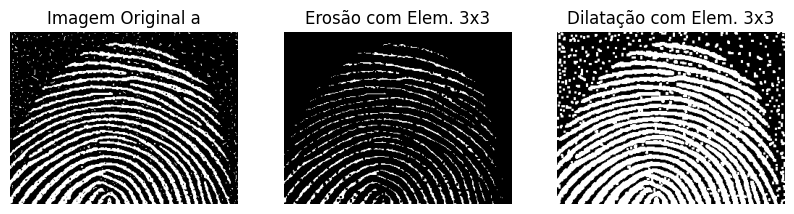

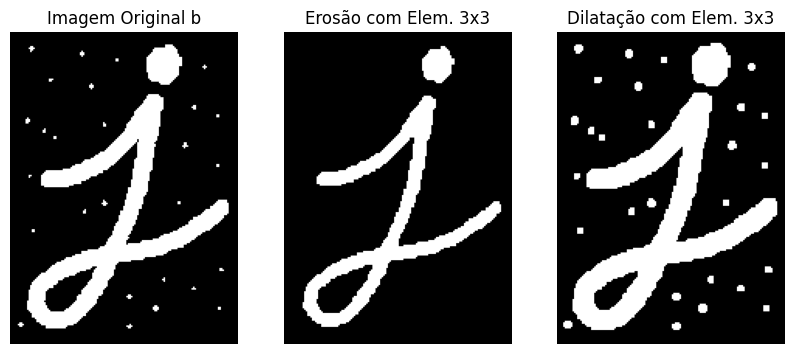

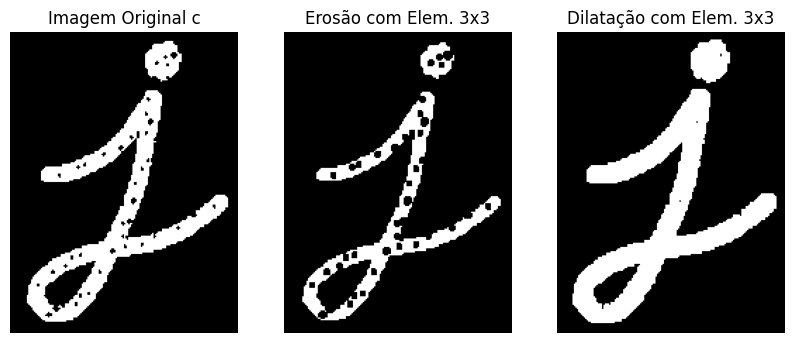

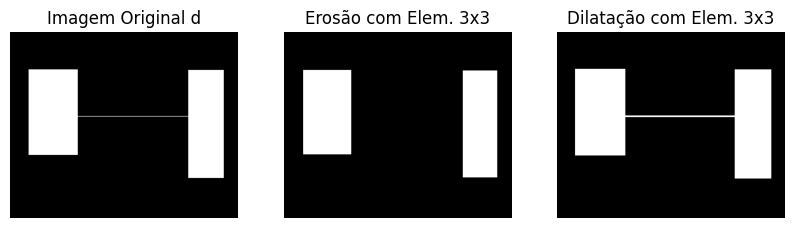

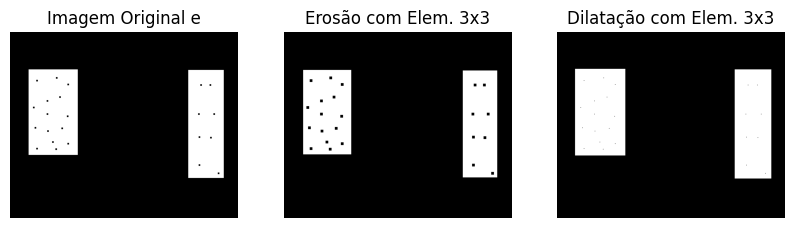

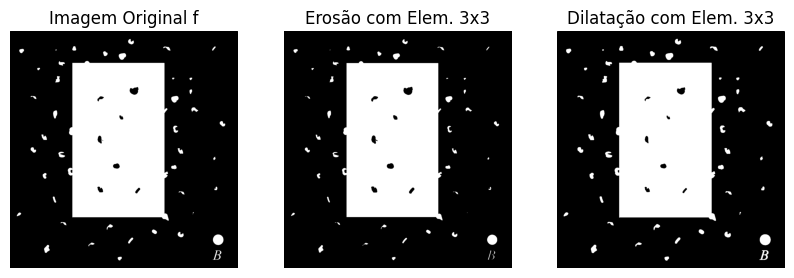

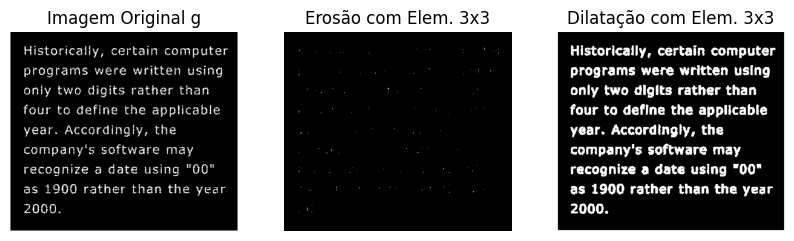

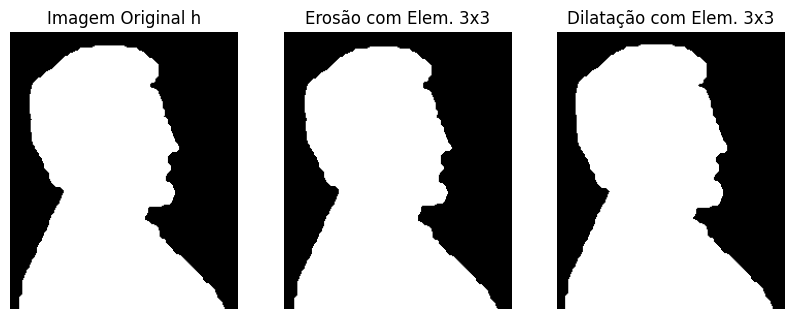

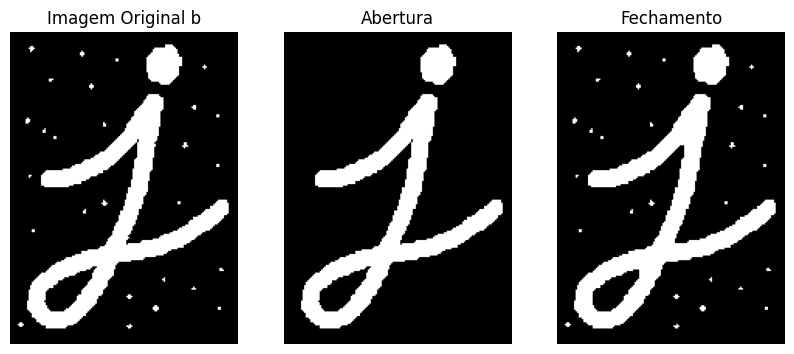

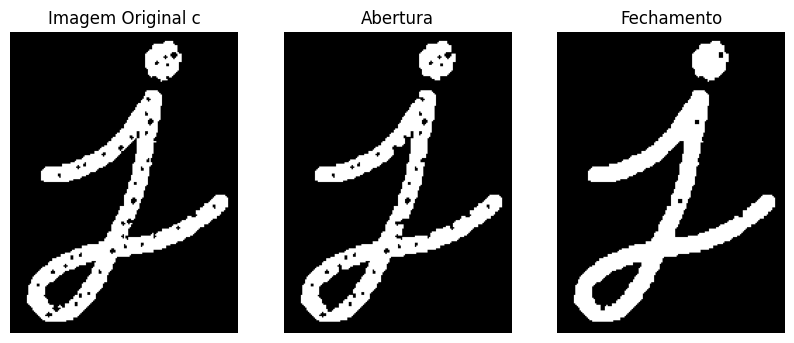

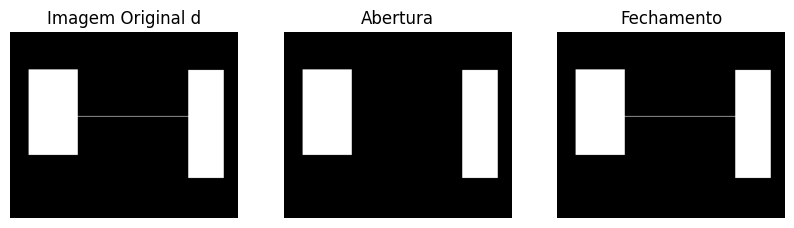

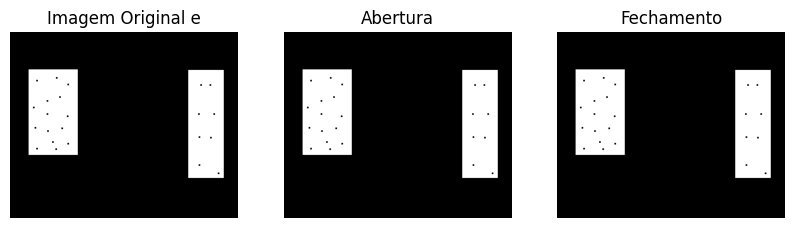

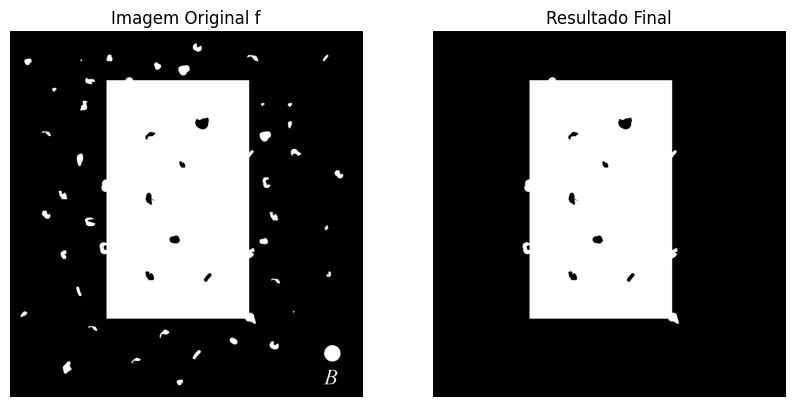

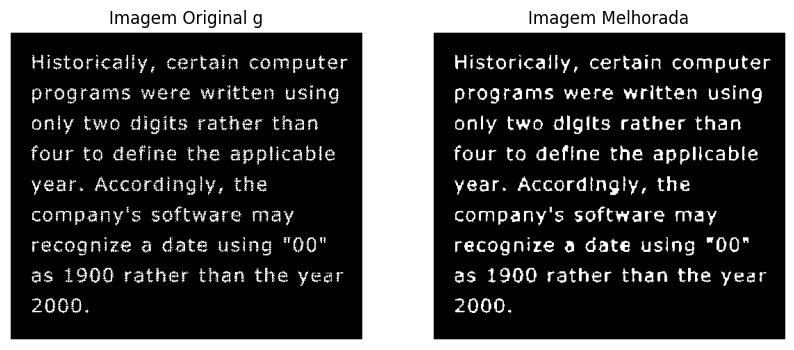

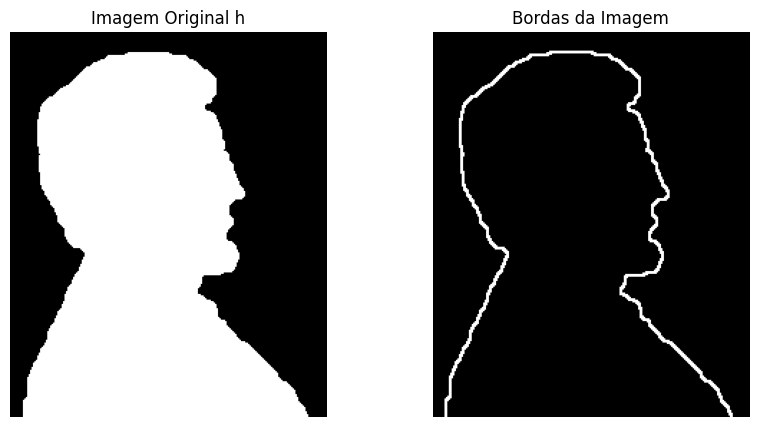

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Função para carregar e exibir imagens em escala de cinza
def abrir_imagem(caminho):
    img = Image.open(caminho).convert('L')
    print(f"Formato: {img.format}, Tamanho: {img.size}, Modo: {img.mode}")
    return img, np.array(img)

# Função para exibir imagens lado a lado
def plotar_imagens(titulos, *imagens):
    num_imagens = len(imagens)
    fig, ax = plt.subplots(nrows=1, ncols=num_imagens, figsize=(10, 5))
    for i in range(num_imagens):
        ax[i].imshow(imagens[i], cmap='gray')
        ax[i].set_title(titulos[i])
        ax[i].axis('off')
    plt.show()

# 1) Erosão e Dilatação
def exercicio_1(imagens, elemento1):
    for chave, (imagem_pil, imagem_np) in imagens.items():
        eroded = cv2.erode(imagem_np, elemento1, iterations=1)
        dilated = cv2.dilate(imagem_np, elemento1, iterations=1)

        plotar_imagens([f"Imagem Original {chave}", "Erosão com Elem. 3x3", "Dilatação com Elem. 3x3"],imagem_np, eroded, dilated)

# 2) Abertura e Fechamento
def exercicio_2(imagens, elemento1):
    for chave in ['b', 'c', 'd', 'e']:
        imagem_pil, imagem_np = imagens[chave]
        opened = cv2.morphologyEx(imagem_np, cv2.MORPH_OPEN, elemento1)
        closed = cv2.morphologyEx(imagem_np, cv2.MORPH_CLOSE, elemento1)

        plotar_imagens([f"Imagem Original {chave}", "Abertura", "Fechamento"], imagem_np, opened, closed)

# 3) Retângulo Branco ao Centro
def exercicio_3(imagem_f, elemento1, elemento2):
    imagem_pil, imagem_np = imagem_f

    closed_img = cv2.morphologyEx(imagem_np, cv2.MORPH_CLOSE, elemento1)
    contours, _ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(imagem_np)
    cv2.drawContours(mask, [largest_contour], -1, 255, cv2.FILLED)
    result = cv2.bitwise_and(imagem_np, imagem_np, mask=mask)

    plotar_imagens(["Imagem Original f", "Resultado Final"], imagem_np, result)

# 4) Melhorar Imagem g
def exercicio_4(imagem_g, elemento1):
    imagem_pil, imagem_np = imagem_g
    melhorada_g = cv2.morphologyEx(imagem_np, cv2.MORPH_CLOSE, elemento1)

    plotar_imagens(["Imagem Original g", "Imagem Melhorada"], imagem_np, melhorada_g)

# 5) Extrair Borda da Imagem h
def exercicio_5(imagem_h, elemento1):
    imagem_pil, imagem_np = imagem_h
    gradient_h = cv2.morphologyEx(imagem_np, cv2.MORPH_GRADIENT, elemento1)

    plotar_imagens(["Imagem Original h", "Bordas da Imagem"], imagem_np, gradient_h)

def main():

    caminhos_imagens = {
        'a': 'a.tif',
        'b': 'b.tif',
        'c': 'c.tif',
        'd': 'd.tif',
        'e': 'e.tif',
        'f': 'f.tif',
        'g': 'g.tif',
        'h': 'h.tif'
    }

    imagens = {chave: abrir_imagem(caminho) for chave, caminho in caminhos_imagens.items()}

    elemento1 = np.ones((3, 3), np.uint8)  # Elemento estruturante 3x3
    elemento2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Elemento estruturante 5x5

    exercicio_1(imagens, elemento1)
    exercicio_2(imagens, elemento1)
    exercicio_3(imagens['f'], elemento1, elemento2)
    exercicio_4(imagens['g'], elemento1)
    exercicio_5(imagens['h'], elemento1)

if __name__ == "__main__":
    main()
